In [12]:
# handle loading both datasets and doing some comparisons

import os, sys
import glob
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
from sklearn.utils import check_X_y, safe_mask, as_float_array
import pickle
import seaborn as sns

# proj_path = '/content/drive/MyDrive/STAT685/685_project_repo'
proj_path = 'G:/My Drive/STAT685/685_project_repo'
# proj_path = '/Users/rayhinton/OneDrive/OneDrive - AMNH/misc-other/school/stat685/project/685_project_repo'

# choose data set
# d_choice = '8702'
d_choice = '4302'

In [2]:
int_df_8702 = pd.read_csv(os.path.join(proj_path, 'DATA', f'OvarianDataset8702_intensities.csv'))
int_df_8702.head()
int_colnames_8702 = int_df_8702.columns

X_int_8702 = int_df_8702.iloc[:, :-1]
y_8702 = int_df_8702.iloc[:, -1].ravel()
print(f'{int_df_8702.shape = }')
print(f'{X_int_8702.shape = }')
print(f'{y_8702.shape = }')

int_df_4302 = pd.read_csv(os.path.join(proj_path, 'DATA', f'OvarianDataset4302_intensities.csv'))
int_df_4302.head()
int_colnames_4302 = int_df_4302.columns

X_int_4302 = int_df_4302.iloc[:, :-1]
y_4302 = int_df_4302.iloc[:, -1].ravel()
print(f'{int_df_4302.shape = }')
print(f'{X_int_4302.shape = }')
print(f'{y_4302.shape = }')

int_df_8702.shape = (253, 15155)
X_int_8702.shape = (253, 15154)
y_8702.shape = (253,)
int_df_4302.shape = (200, 15155)
X_int_4302.shape = (200, 15154)
y_4302.shape = (200,)


1    100
0    100
Name: y, dtype: int64
1    162
0     91
Name: y, dtype: int64
Index(['y', 'dataset'], dtype='object')


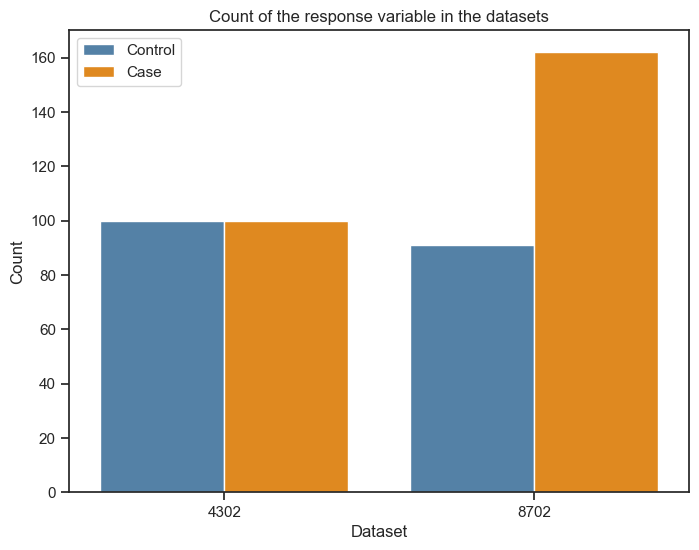

In [39]:
print(int_df_4302['y'].value_counts())
print(int_df_8702['y'].value_counts())

stacked_y = pd.concat([int_df_4302[['y']], int_df_8702[['y']]])
stacked_y['dataset'] = ['4302'] * len(int_df_4302) + ['8702'] * len(int_df_8702)

print(stacked_y.columns)

# Create the bar plot
sns.set(rc={"figure.figsize":(8,6)})
sns.set_style("ticks")
ax = sns.countplot(x = 'dataset', hue = 'y', data = stacked_y,
                    palette = {0: 'steelblue', 1: '#cc8963'})
ax.set(xlabel='Dataset', ylabel='Count', title='Count of the response variable in the datasets')
# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Control', 'Case'])

plt.savefig('PLOTS/1_introduction_breakdown-response-variable.png')

    Dataset Algorithm   Features  Accuracy   ROC AUC  Sensitivity  Specificity
0      8702        LR    entropy  0.919231  0.969487     0.914007     0.924308
1      8702        LR  intensity  0.974084  0.997008     0.976452     0.971538
2      8702        LR   combined  0.991172  0.999627     0.989398     0.992835
3      8702       SVM    entropy  0.916636  0.967121     0.922258     0.911100
4      8702       SVM  intensity  0.971661  0.995923     0.971480     0.971624
5      8702       SVM   combined  0.990610  0.999562     0.988405     0.992717
6      8702       KNN    entropy  0.914321  0.956882     0.924724     0.903935
7      8702       KNN  intensity  0.973571  0.987331     0.973430     0.973534
8      8702       KNN   combined  0.990665  0.995245     0.990538     0.990688
9      4302        LR    entropy  0.765314  0.854066     0.828119     0.700021
10     4302        LR  intensity  0.960360  0.979843     0.975936     0.944557
11     4302        LR   combined  0.956445  0.988198

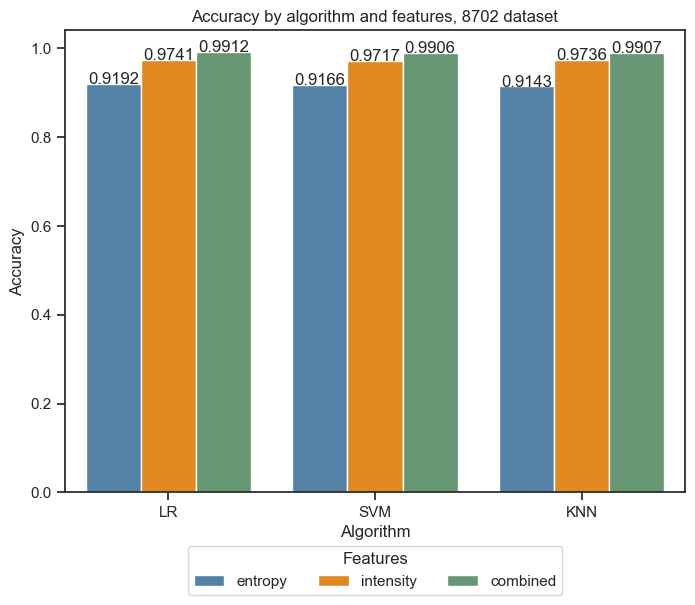

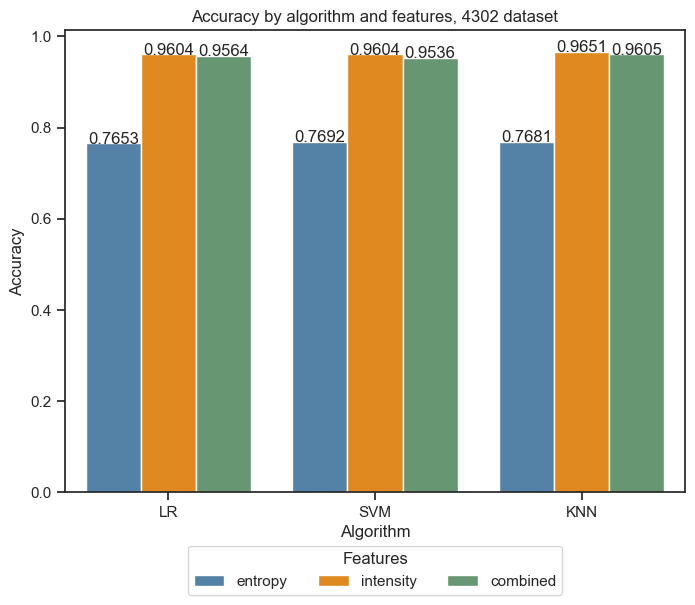

In [79]:
# bar plot of results

results_rjh = pd.read_excel('RESULTS/results_summary.xlsx')
print(results_rjh)

alg_order = ['LR', 'SVM', 'KNN']
feat_order = ['entropy', 'intensity', 'combined']
colors = ['steelblue', 'darkorange', '#5f9e6e']

for dataset in [8702, 4302]:
    dataset_results = results_rjh[results_rjh['Dataset'] == dataset]

    sns.set(rc={"figure.figsize":(8,6)})
    sns.set_style("ticks")
    ax = sns.barplot(x = 'Algorithm', y = 'Accuracy', hue = 'Features', 
                data = dataset_results, order = alg_order, hue_order = feat_order, palette = colors)
    ax.set(xlabel='Algorithm', ylabel='Accuracy', title=f'Accuracy by algorithm and features, {dataset} dataset')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Features', loc = 'upper center', bbox_to_anchor = (0.5, -0.1), ncol = 3)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height, f'{round(height, 4)}',
                ha = 'center')
    
    plt.show()
    ax.get_figure().savefig(f'PLOTS/4_results_mine-{dataset}.png', bbox_inches='tight')

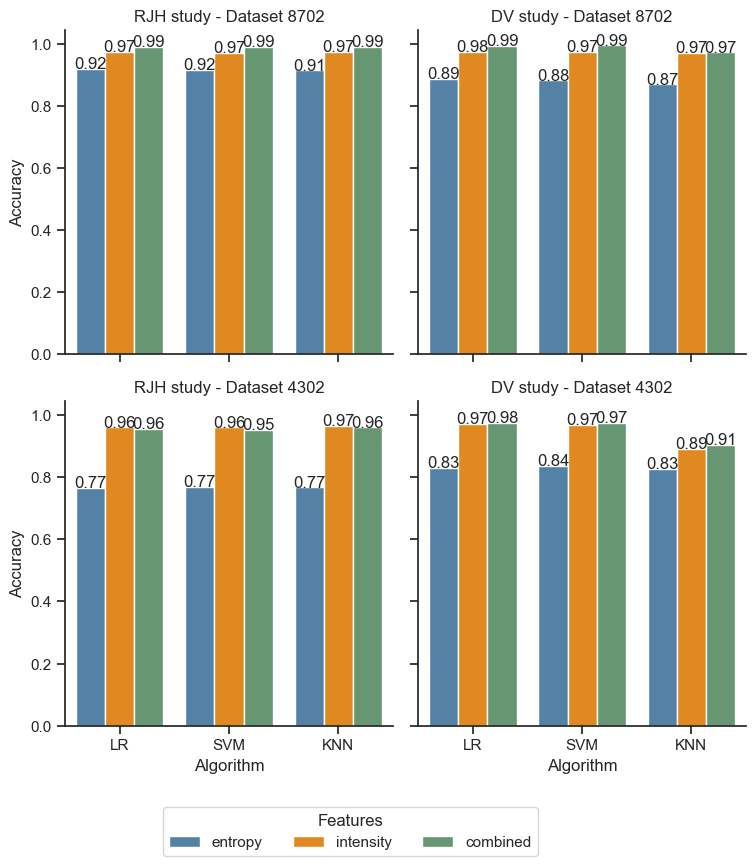

In [114]:
# bar plot of results

results_dvrjh = pd.read_excel('RESULTS/results_summary_DV-RJH.xlsx')

sns.set(rc={"figure.figsize":(10,8)})
sns.set_style("ticks")

g = sns.FacetGrid(results_dvrjh, row = 'Dataset', row_order=[8702, 4302],
                 col = 'Study', col_order=['RJH', 'DV'], height = 4)
g.map(sns.barplot, 'Algorithm', 'Accuracy', 'Features', order = alg_order, hue_order = feat_order, palette = colors)
g.set_axis_labels('Algorithm', 'Accuracy')
g.set_titles('{col_name} study - Dataset {row_name}')
g.add_legend(title='Features', loc='center right', bbox_to_anchor=(0.5, -0.05), ncol = 3, frameon = True)

for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height, f'{round(height, 2)}',
                ha = 'center')

plt.show()
g.savefig('PLOTS/4_results_DV-RJH-vert.png')

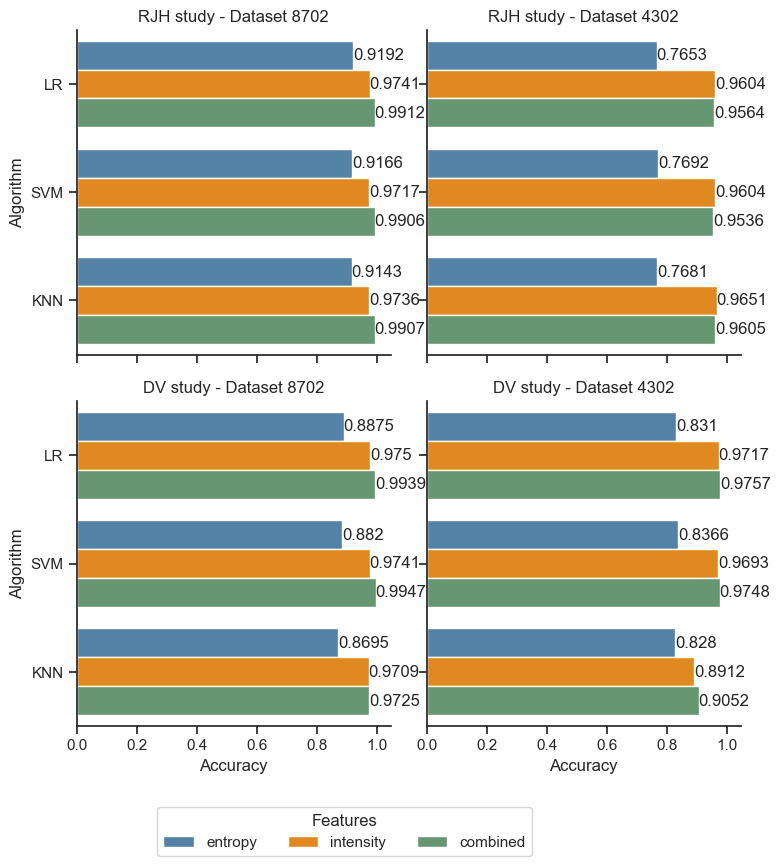

In [115]:
results_dvrjh = pd.read_excel('RESULTS/results_summary_DV-RJH.xlsx')

sns.set(rc={"figure.figsize":(10,8)})
sns.set_style("ticks")

g = sns.FacetGrid(results_dvrjh, row = 'Study', row_order=['RJH', 'DV'],
                 col = 'Dataset', col_order=[8702, 4302], height = 4)
g.fig.subplots_adjust(wspace=1, hspace=1)
g.map(sns.barplot, 'Accuracy', 'Algorithm', 'Features', order = alg_order, hue_order = feat_order, palette = colors)
g.set_axis_labels('Accuracy', 'Algorithm')
g.set_titles('{row_name} study - Dataset {col_name}')
g.add_legend(title='Features', loc='center right', bbox_to_anchor=(0.5, -0.05), ncol = 3, frameon = True)

for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_width(), p.get_y() + p.get_height()/2., f'{round(p.get_width(), 4)}',
                va = 'center')

plt.show()
g.savefig('PLOTS/4_results_DV-RJH-hor.png')